<a href="https://colab.research.google.com/github/PPadgett/AddModule/blob/master/Week1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Build a deep neural network (MLP)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/course_10_1

####Get Data

In [ ]:
!wget -O iris.csv https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv \


In [ ]:
import pandas
df = pandas.read_csv("iris.csv")

In [ ]:
df.shape

(150, 5)

In [ ]:
print("total data size:", len(df))
print("dataset head:")
df.head(5)

total data size: 150
dataset head:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
labels=df.species.unique()
print("label are:", labels)

label are: ['setosa' 'versicolor' 'virginica']


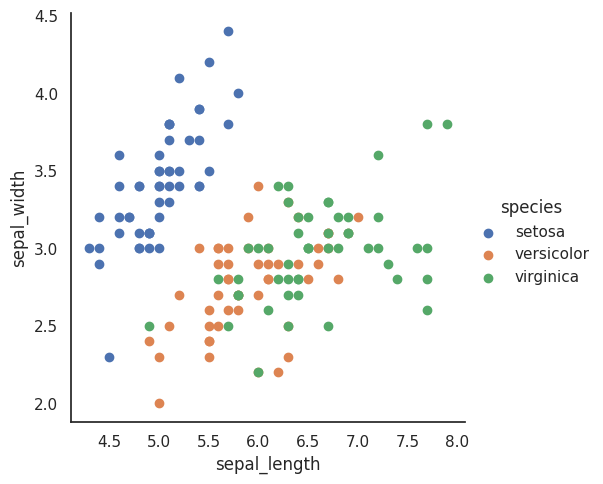

In [ ]:
import seaborn as sns  #seaborn is for statistical data visualizaton
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)
sns.FacetGrid(df, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.show()

In [ ]:
mappings={}
for i in range(len(labels)):
  mappings[labels[i]]=i
print(mappings)
#mappings = {"setosa": 0, "versicolor": 1,"virginica": 2}

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [ ]:
df["species"] = df["species"].apply(lambda x: mappings[x])
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop("species",axis=1).values
y = df["species"].values

In [ ]:
split=int(0.8*len(df))
print("split=",split)
X_train=X[:split]
X_test=X[split:]
y_train=y[:split]
y_test=y[split:]
print("Training data:", X_train.shape, y_train.shape)
print("Testing data:", X_test.shape, y_test.shape)

split= 120
Training data: (120, 4) (120,)
Testing data: (30, 4) (30,)


In [ ]:
print(X_train.shape[1])

4


In [ ]:
import torch
X_train, y_train = torch.FloatTensor(X_train), torch.LongTensor(y_train)
X_test, y_test = torch.FloatTensor(X_test), torch.LongTensor(y_test)

In [ ]:
import torch
import torch.nn as nn

def MLP(input_size, hidden1_size, hidden2_size, output_size):
  h1=nn.Sequential(nn.Linear(input_size, hidden1_size),nn.ReLU())
  h2=nn.Sequential(h1, nn.Linear(hidden1_size, hidden2_size),nn.ReLU())
  mlp=nn.Sequential(h2, nn.Linear(hidden2_size, output_size))
  return mlp

output_size=len(labels)
input_size=X_train.shape[1]

In [ ]:
from torch.nn.functional import cross_entropy

epochs = 200
learning_rate=0.01
def train (epochs, X_train, y_train, X_test, y_test):
  print ("input_size, output_size=",input_size, output_size)
  network = MLP(input_size, 30, 30, output_size)  #network is an neural network with 2 hidden layers
  #optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)
  optimizer = torch.optim.adam(network.parameters(), lr=learning_rate)
  train_total=len(X_train)
  test_total=len(X_test)
  losses = []
  for i in range(epochs):
      y_pred = network.forward(X_train)
      loss = cross_entropy(y_pred, y_train)
      losses.append(loss)

      loss.backward()
      optimizer.step()
      #reset gradient to 0
      optimizer.zero_grad()

      if i % 20 == 0:
        train_loss = cross_entropy(y_pred, y_train)
        with torch.no_grad():
          y_pred = network.forward(X_test)
          #print(y_pred)
          #print(y_test)
          test_loss = cross_entropy(y_pred, y_test)
          print(f'Epoch: {i:2}\t train loss: {loss.item():10.8f} \t test_test: {test_loss.item():10.8f}')


In [ ]:
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.05899203 	 test_test: 1.87206912
Epoch: 20	 train loss: 0.94062573 	 test_test: 1.70076513
Epoch: 40	 train loss: 0.85380918 	 test_test: 1.61794651
Epoch: 60	 train loss: 0.76717663 	 test_test: 1.52919769
Epoch: 80	 train loss: 0.68357497 	 test_test: 1.43917036
Epoch: 100	 train loss: 0.61024255 	 test_test: 1.34996617
Epoch: 120	 train loss: 0.55010730 	 test_test: 1.27286077
Epoch: 140	 train loss: 0.50245339 	 test_test: 1.20873606
Epoch: 160	 train loss: 0.46471176 	 test_test: 1.15639770
Epoch: 180	 train loss: 0.43455961 	 test_test: 1.11334753


In [ ]:
epochs=400
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.08415866 	 test_test: 1.33301234
Epoch: 20	 train loss: 1.00092578 	 test_test: 1.48195386
Epoch: 40	 train loss: 0.95842785 	 test_test: 1.50938857
Epoch: 60	 train loss: 0.91270638 	 test_test: 1.47942758
Epoch: 80	 train loss: 0.85679907 	 test_test: 1.43806696
Epoch: 100	 train loss: 0.79134172 	 test_test: 1.38419521
Epoch: 120	 train loss: 0.71933264 	 test_test: 1.32234704
Epoch: 140	 train loss: 0.64737928 	 test_test: 1.26233113
Epoch: 160	 train loss: 0.58281648 	 test_test: 1.21137774
Epoch: 180	 train loss: 0.52942818 	 test_test: 1.16877723
Epoch: 200	 train loss: 0.48717016 	 test_test: 1.13403678
Epoch: 220	 train loss: 0.45407802 	 test_test: 1.10655439
Epoch: 240	 train loss: 0.42776310 	 test_test: 1.08340561
Epoch: 260	 train loss: 0.40618598 	 test_test: 1.06238806
Epoch: 280	 train loss: 0.38791668 	 test_test: 1.04296637
Epoch: 300	 train loss: 0.37182686 	 test_test: 1.02526546
Epoch: 320	 train loss: 0.357348

In [ ]:
epochs=600
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.21589589 	 test_test: 0.93716222
Epoch: 20	 train loss: 0.99531764 	 test_test: 1.49416113
Epoch: 40	 train loss: 0.93484664 	 test_test: 1.52736104
Epoch: 60	 train loss: 0.86930764 	 test_test: 1.46663284
Epoch: 80	 train loss: 0.79884511 	 test_test: 1.40056252
Epoch: 100	 train loss: 0.72400820 	 test_test: 1.32504618
Epoch: 120	 train loss: 0.65026301 	 test_test: 1.25239646
Epoch: 140	 train loss: 0.58342230 	 test_test: 1.18840039
Epoch: 160	 train loss: 0.52685571 	 test_test: 1.13444746
Epoch: 180	 train loss: 0.48065969 	 test_test: 1.09030831
Epoch: 200	 train loss: 0.44341406 	 test_test: 1.05313468
Epoch: 220	 train loss: 0.41285759 	 test_test: 1.01998210
Epoch: 240	 train loss: 0.38711545 	 test_test: 0.98944068
Epoch: 260	 train loss: 0.36480504 	 test_test: 0.96295637
Epoch: 280	 train loss: 0.34486836 	 test_test: 0.93537718
Epoch: 300	 train loss: 0.32660982 	 test_test: 0.90870482
Epoch: 320	 train loss: 0.309625

In [ ]:
epochs=800
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.06153941 	 test_test: 1.81653464
Epoch: 20	 train loss: 1.01258063 	 test_test: 1.59451234
Epoch: 40	 train loss: 0.97844964 	 test_test: 1.53470671
Epoch: 60	 train loss: 0.94335532 	 test_test: 1.49980712
Epoch: 80	 train loss: 0.90346539 	 test_test: 1.46207845
Epoch: 100	 train loss: 0.85759795 	 test_test: 1.42179680
Epoch: 120	 train loss: 0.80578506 	 test_test: 1.37696385
Epoch: 140	 train loss: 0.74762326 	 test_test: 1.33232415
Epoch: 160	 train loss: 0.68507755 	 test_test: 1.28364444
Epoch: 180	 train loss: 0.62154907 	 test_test: 1.23435485
Epoch: 200	 train loss: 0.56347191 	 test_test: 1.18608260
Epoch: 220	 train loss: 0.51396930 	 test_test: 1.14579546
Epoch: 240	 train loss: 0.47277167 	 test_test: 1.11702037
Epoch: 260	 train loss: 0.43725061 	 test_test: 1.07676768
Epoch: 280	 train loss: 0.41017327 	 test_test: 1.05018950
Epoch: 300	 train loss: 0.38827983 	 test_test: 1.02775240
Epoch: 320	 train loss: 0.369845

In [ ]:
epochs=1200
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.07285953 	 test_test: 1.61903059
Epoch: 20	 train loss: 0.98658329 	 test_test: 1.68865573
Epoch: 40	 train loss: 0.92570531 	 test_test: 1.68729746
Epoch: 60	 train loss: 0.86901110 	 test_test: 1.66910338
Epoch: 80	 train loss: 0.80324167 	 test_test: 1.63735890
Epoch: 100	 train loss: 0.73091519 	 test_test: 1.59025419
Epoch: 120	 train loss: 0.65757149 	 test_test: 1.52849066
Epoch: 140	 train loss: 0.59123272 	 test_test: 1.46323395
Epoch: 160	 train loss: 0.53780925 	 test_test: 1.39172328
Epoch: 180	 train loss: 0.49655801 	 test_test: 1.32208598
Epoch: 200	 train loss: 0.46414068 	 test_test: 1.26396263
Epoch: 220	 train loss: 0.43826661 	 test_test: 1.21385646
Epoch: 240	 train loss: 0.41713089 	 test_test: 1.17268193
Epoch: 260	 train loss: 0.39942247 	 test_test: 1.13811731
Epoch: 280	 train loss: 0.38417166 	 test_test: 1.10824788
Epoch: 300	 train loss: 0.37072918 	 test_test: 1.08276165
Epoch: 320	 train loss: 0.358525

In [ ]:
epochs=2000
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.12085450 	 test_test: 1.16142142
Epoch: 20	 train loss: 0.98714459 	 test_test: 1.59533119
Epoch: 40	 train loss: 0.92838913 	 test_test: 1.65721786
Epoch: 60	 train loss: 0.86776030 	 test_test: 1.63381839
Epoch: 80	 train loss: 0.80043465 	 test_test: 1.57463086
Epoch: 100	 train loss: 0.72900605 	 test_test: 1.49781740
Epoch: 120	 train loss: 0.65810007 	 test_test: 1.41344714
Epoch: 140	 train loss: 0.59322208 	 test_test: 1.33424866
Epoch: 160	 train loss: 0.53775316 	 test_test: 1.26315331
Epoch: 180	 train loss: 0.49193084 	 test_test: 1.20063591
Epoch: 200	 train loss: 0.45303118 	 test_test: 1.14367402
Epoch: 220	 train loss: 0.42015332 	 test_test: 1.09058309
Epoch: 240	 train loss: 0.39414269 	 test_test: 1.04848850
Epoch: 260	 train loss: 0.37211296 	 test_test: 1.01281273
Epoch: 280	 train loss: 0.35279170 	 test_test: 0.97945362
Epoch: 300	 train loss: 0.33532757 	 test_test: 0.94899774
Epoch: 320	 train loss: 0.319190

In [ ]:
epochs=3000
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.11988056 	 test_test: 1.06235814
Epoch: 20	 train loss: 1.03295755 	 test_test: 1.42995119
Epoch: 40	 train loss: 1.00580382 	 test_test: 1.56711459
Epoch: 60	 train loss: 0.98136967 	 test_test: 1.60435116
Epoch: 80	 train loss: 0.95632797 	 test_test: 1.59987271
Epoch: 100	 train loss: 0.92688793 	 test_test: 1.57866299
Epoch: 120	 train loss: 0.89151800 	 test_test: 1.54760849
Epoch: 140	 train loss: 0.84471065 	 test_test: 1.47677195
Epoch: 160	 train loss: 0.79430735 	 test_test: 1.41834033
Epoch: 180	 train loss: 0.73832905 	 test_test: 1.35804951
Epoch: 200	 train loss: 0.67975032 	 test_test: 1.29500711
Epoch: 220	 train loss: 0.62298763 	 test_test: 1.23875260
Epoch: 240	 train loss: 0.57118702 	 test_test: 1.19247627
Epoch: 260	 train loss: 0.52607697 	 test_test: 1.15223694
Epoch: 280	 train loss: 0.48792335 	 test_test: 1.11613500
Epoch: 300	 train loss: 0.45600250 	 test_test: 1.08496654
Epoch: 320	 train loss: 0.429181

In [ ]:
epochs = 1000
learning_rate=0.03
train (epochs, X_train, y_train, X_test, y_test)

input_size, output_size= 4 3
Epoch:  0	 train loss: 1.13678718 	 test_test: 1.13883972
Epoch: 20	 train loss: 0.84132892 	 test_test: 1.49412429
Epoch: 40	 train loss: 0.63115448 	 test_test: 1.35292959
Epoch: 60	 train loss: 0.47637784 	 test_test: 1.17535377
Epoch: 80	 train loss: 0.39109293 	 test_test: 1.03846467
Epoch: 100	 train loss: 0.33732826 	 test_test: 0.95879632
Epoch: 120	 train loss: 0.29482123 	 test_test: 0.88257116
Epoch: 140	 train loss: 0.25781491 	 test_test: 0.81482977
Epoch: 160	 train loss: 0.22466041 	 test_test: 0.75267613
Epoch: 180	 train loss: 0.19576095 	 test_test: 0.69692445
Epoch: 200	 train loss: 0.17118318 	 test_test: 0.64605117
Epoch: 220	 train loss: 0.15038064 	 test_test: 0.60495102
Epoch: 240	 train loss: 0.13239126 	 test_test: 0.56616503
Epoch: 260	 train loss: 0.11715186 	 test_test: 0.53642148
Epoch: 280	 train loss: 0.10553502 	 test_test: 0.51386368
Epoch: 300	 train loss: 0.09629853 	 test_test: 0.49552506
Epoch: 320	 train loss: 0.088810